In [129]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map, CircleMarker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Folder containing datasets
folder_path = 'C:\\Users\\dell\\Desktop\\giga_hiring_challenge\\mobility_4_test' # Replace with your folder path

# Collect and merge all datasets
all_data = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Extract time period from the filename
        time_period = file.split('.')[0]  # Example: day1_000
        data = pd.read_csv(file_path)
        data['time_period'] = time_period
        all_data.append(data)

# Combine all data into a single DataFrame
df = pd.concat(all_data, ignore_index=True)



In [130]:
df

,Unnamed: 0,index,Baseline: People Moving,Crisis: People Moving,x0,y0,x1,y1,time_period
0,0,7515,14.000000,30,62.788086,8.425543,62.963867,8.425543,day1_0000
1,1,7517,11.000000,24,62.788086,8.425543,63.227540,8.256863,day1_0000
2,2,7519,16.666667,45,62.788086,8.425543,63.315430,8.172468,day1_0000
3,3,7520,14.000000,31,62.788086,8.425543,63.491210,8.425543,day1_0000
4,4,7542,13.000000,38,62.788086,9.350634,63.139650,9.350634,day1_0000
...,...,...,...,...,...,...,...,...,...
14154,288,3475,12.000000,45,65.864260,11.932035,65.776370,11.932035,day7_1600
14155,289,3476,14.000000,39,65.864260,11.932035,65.864260,12.014641,day7_1600
14156,290,3478,12.000000,38,65.864260,12.673901,65.776370,12.673901,day7_1600
14157,291,3479,23.333333,56,65.864260,12.673901,65.864260,12.591646,day7_1600


In [131]:
df.to_csv("df.csv", index=False)

In [132]:
df.columns

Index(['Unnamed: 0', 'index', 'Baseline: People Moving',
       'Crisis: People Moving', 'x0', 'y0', 'x1', 'y1', 'time_period'],
      dtype='object')

In [133]:
# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Remove unnecessary columns (e.g., 'Unnamed: 0')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Check the data types
print(df.dtypes)

   Unnamed: 0  index  Baseline: People Moving  Crisis: People Moving  \
0           0   7515                14.000000                     30   
1           1   7517                11.000000                     24   
2           2   7519                16.666667                     45   
3           3   7520                14.000000                     31   
4           4   7542                13.000000                     38   

          x0        y0         x1        y1 time_period  
0  62.788086  8.425543  62.963867  8.425543   day1_0000  
1  62.788086  8.425543  63.227540  8.256863   day1_0000  
2  62.788086  8.425543  63.315430  8.172468   day1_0000  
3  62.788086  8.425543  63.491210  8.425543   day1_0000  
4  62.788086  9.350634  63.139650  9.350634   day1_0000  
Unnamed: 0                 0
index                      0
Baseline: People Moving    0
Crisis: People Moving      0
x0                         0
y0                         0
x1                         0
y1              

In [134]:
df

,index,Baseline: People Moving,Crisis: People Moving,x0,y0,x1,y1,time_period
0,7515,14.000000,30,62.788086,8.425543,62.963867,8.425543,day1_0000
1,7517,11.000000,24,62.788086,8.425543,63.227540,8.256863,day1_0000
2,7519,16.666667,45,62.788086,8.425543,63.315430,8.172468,day1_0000
3,7520,14.000000,31,62.788086,8.425543,63.491210,8.425543,day1_0000
4,7542,13.000000,38,62.788086,9.350634,63.139650,9.350634,day1_0000
...,...,...,...,...,...,...,...,...
14154,3475,12.000000,45,65.864260,11.932035,65.776370,11.932035,day7_1600
14155,3476,14.000000,39,65.864260,11.932035,65.864260,12.014641,day7_1600
14156,3478,12.000000,38,65.864260,12.673901,65.776370,12.673901,day7_1600
14157,3479,23.333333,56,65.864260,12.673901,65.864260,12.591646,day7_1600


In [135]:
import pandas as pd

# Example function to calculate relative change
def calculate_relative_change(df):
    # Calculate relative change: (Crisis - Baseline) / Baseline * 100
    df['relative_change'] = ((df['Crisis: People Moving'] - df['Baseline: People Moving']) / df['Baseline: People Moving']) * 100
    return df

# Load your data (assuming all CSV files are combined in one DataFrame)
df_combined = pd.read_csv('df.csv')  # Replace with your actual file path

# Ensure that 'Baseline' and 'Crisis' columns are numeric
df_combined['Baseline: People Moving'] = pd.to_numeric(df_combined['Baseline: People Moving'], errors='coerce')
df_combined['Crisis: People Moving'] = pd.to_numeric(df_combined['Crisis: People Moving'], errors='coerce')

# Apply the relative change calculation
df_combined = calculate_relative_change(df_combined)

# Handle edge cases (e.g., Crisis = 0)
df_combined['relative_change'] = df_combined['relative_change'].fillna(-100)  # Example: treat 0 mobility as 100% reduction

# Check the resulting DataFrame
print(df_combined.head())

# Optional: Save the results to a new CSV
df_combined.to_csv('mobility_analysis_results.csv', index=False)


   Unnamed: 0  index  Baseline: People Moving  Crisis: People Moving  \
0           0   7515                14.000000                     30   
1           1   7517                11.000000                     24   
2           2   7519                16.666667                     45   
3           3   7520                14.000000                     31   
4           4   7542                13.000000                     38   

          x0        y0         x1        y1 time_period  relative_change  
0  62.788086  8.425543  62.963867  8.425543   day1_0000       114.285714  
1  62.788086  8.425543  63.227540  8.256863   day1_0000       118.181818  
2  62.788086  8.425543  63.315430  8.172468   day1_0000       170.000000  
3  62.788086  8.425543  63.491210  8.425543   day1_0000       121.428571  
4  62.788086  9.350634  63.139650  9.350634   day1_0000       192.307692  


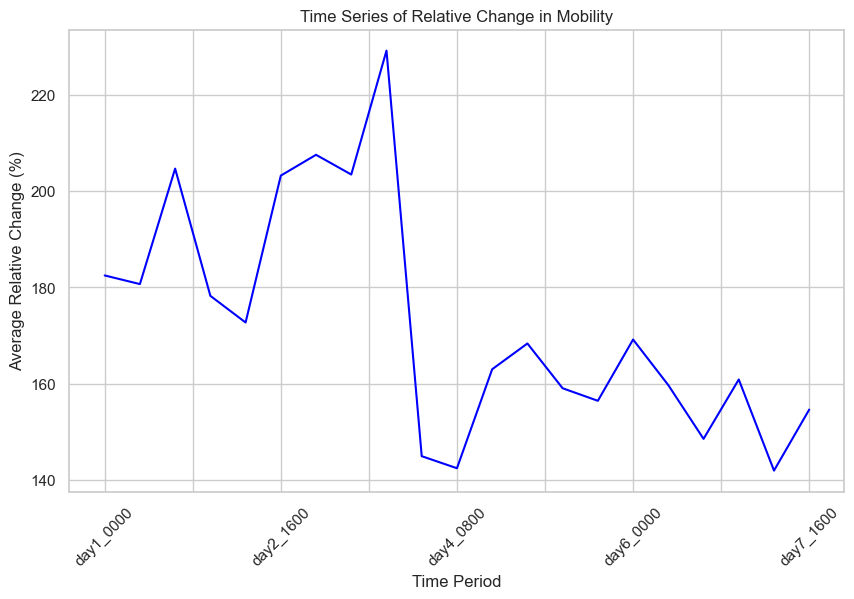

In [136]:
# Aggregate relative change over time
time_series_data = df_combined.groupby('time_period')['relative_change'].mean()

# Plotting the time series of relative change
plt.figure(figsize=(10, 6))
time_series_data.plot(kind='line', color='blue')
plt.title('Time Series of Relative Change in Mobility')
plt.xlabel('Time Period')
plt.ylabel('Average Relative Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


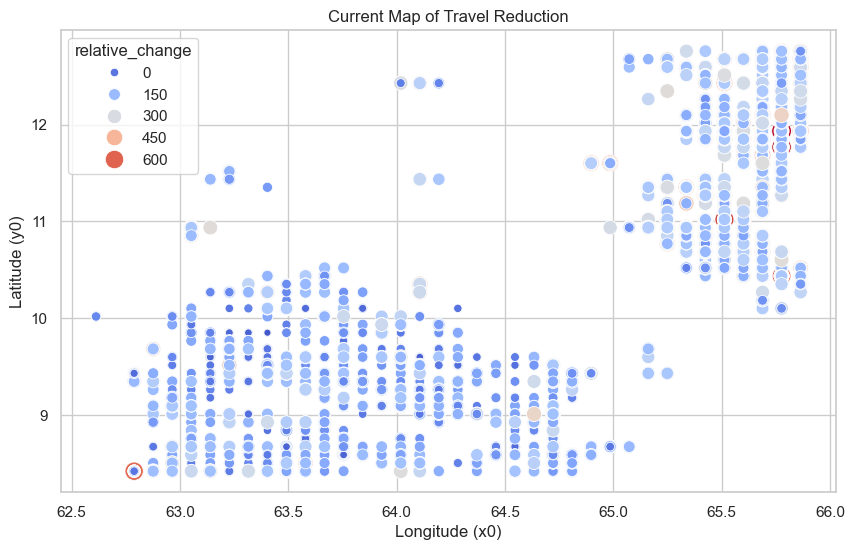

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='x0', y='y0', hue='relative_change', palette='coolwarm', size='relative_change', sizes=(20, 200))
plt.title('Current Map of Travel Reduction')
plt.xlabel('Longitude (x0)')
plt.ylabel('Latitude (y0)')
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_3180\1577575376.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




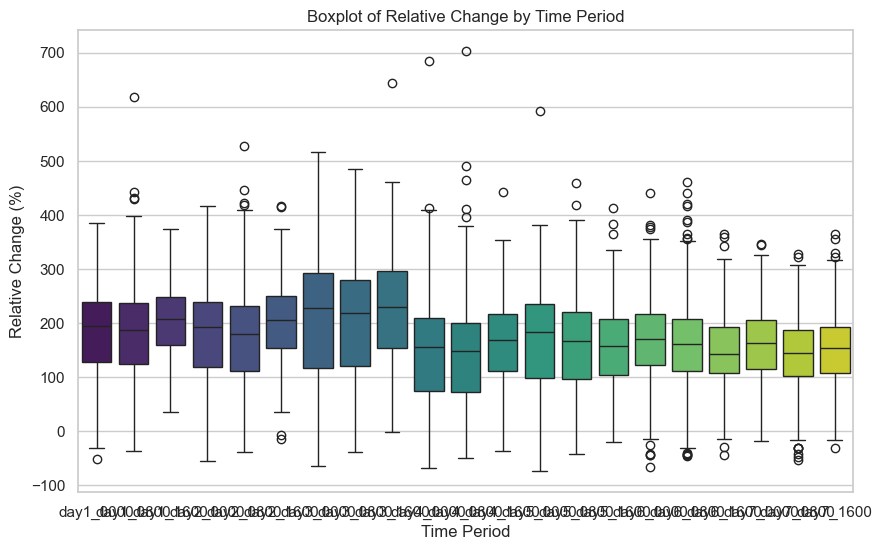

In [138]:
# Plotting relative change for each day to check patterns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='time_period', y='relative_change', palette='viridis')
plt.title('Boxplot of Relative Change by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Relative Change (%)')
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_3180\3687993709.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




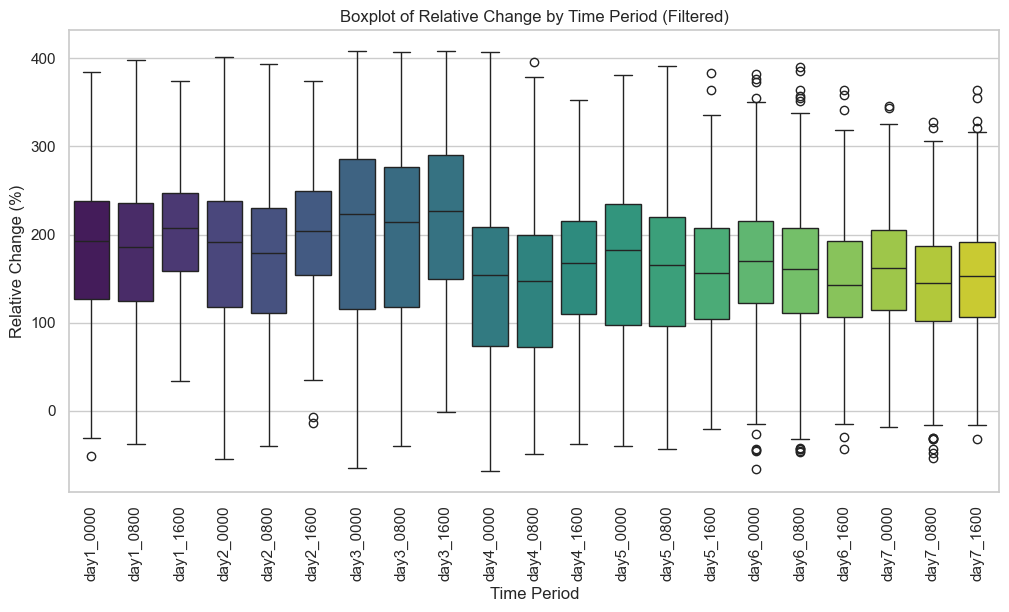

In [139]:
# Remove outliers (optional)
Q1 = df_combined['relative_change'].quantile(0.25)
Q3 = df_combined['relative_change'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_combined[(df_combined['relative_change'] >= (Q1 - 1.5 * IQR)) & (df_combined['relative_change'] <= (Q3 + 1.5 * IQR))]

# You can also separate outliers for further investigation
outliers_df = df_combined[(df_combined['relative_change'] < (Q1 - 1.5 * IQR)) | (df_combined['relative_change'] > (Q3 + 1.5 * IQR))]

# Visualize the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='time_period', y='relative_change', palette='viridis')
plt.title('Boxplot of Relative Change by Time Period (Filtered)')
plt.xlabel('Time Period')
plt.ylabel('Relative Change (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_3180\2665953615.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



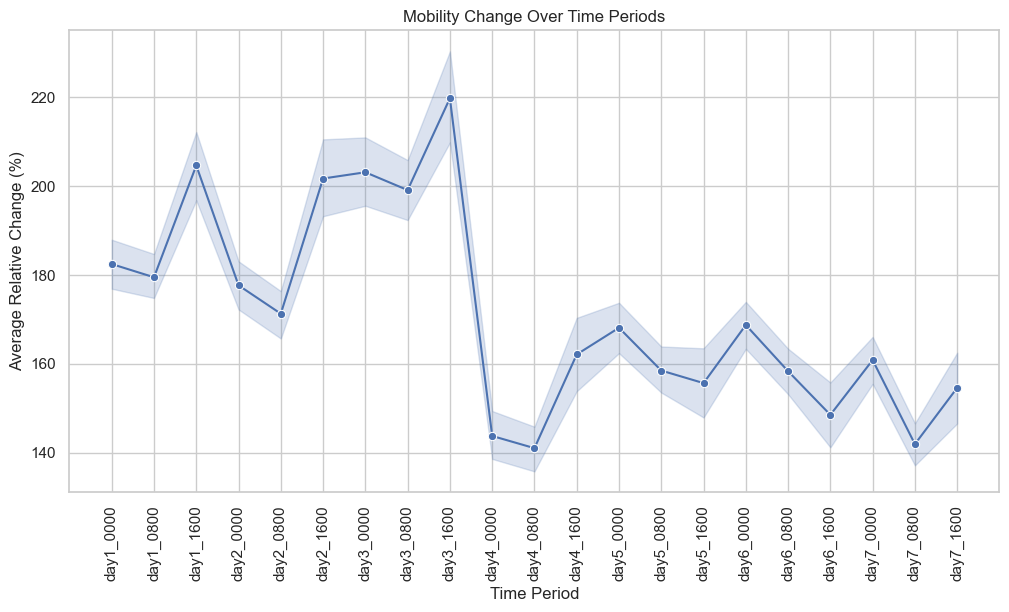

              count        mean         std        min         25%  \
time_period                                                          
day1_0000     876.0  182.492534   81.197250 -51.262327  127.250662   
day1_0800    1014.0  179.515450   80.258876 -37.685460  124.006494   
day1_1600     300.0  204.682223   67.747335  34.042553  159.090909   
day2_0000     841.0  177.694752   83.217824 -55.071090  118.181818   
day2_0800     970.0  171.316616   81.427767 -39.759036  111.363636   
day2_1600     286.0  201.745847   73.255736 -14.285714  153.846154   
day3_0000     753.0  203.155513  106.403573 -64.545455  115.231788   
day3_0800     891.0  199.141696  101.710925 -39.662447  118.213196   
day3_1600     259.0  219.814536   85.387682  -1.515152  149.893254   
day4_0000     927.0  143.792396   85.989054 -68.861343   73.258618   
day4_0800    1069.0  141.041490   85.032894 -49.458484   72.192513   
day4_1600     322.0  162.140664   75.690060 -37.457045  110.301428   
day5_0000     850.0 

In [140]:
# Visualize the average relative change over different time periods
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='time_period', y='relative_change', marker='o', palette='tab10')
plt.title('Mobility Change Over Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Average Relative Change (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Calculate summary statistics (mean, median, std) for relative change by time period
summary_stats = filtered_df.groupby('time_period')['relative_change'].describe()
print(summary_stats)


In [141]:
filtered_df.columns

Index(['Unnamed: 0', 'index', 'Baseline: People Moving',
       'Crisis: People Moving', 'x0', 'y0', 'x1', 'y1', 'time_period',
       'relative_change'],
      dtype='object')

In [142]:
import numpy as np
# Calculate Euclidean distance between origin (x0, y0) and destination (x1, y1)
filtered_df['distance'] = np.sqrt((filtered_df['x1'] - filtered_df['x0'])**2 + (filtered_df['y1'] - filtered_df['y0'])**2)
# Define features for clustering (e.g., relative_change, distance)

C:\Users\dell\AppData\Local\Temp\ipykernel_3180\606644218.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dell\AppData\Local\Temp\ipykernel_3180\1518937224.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



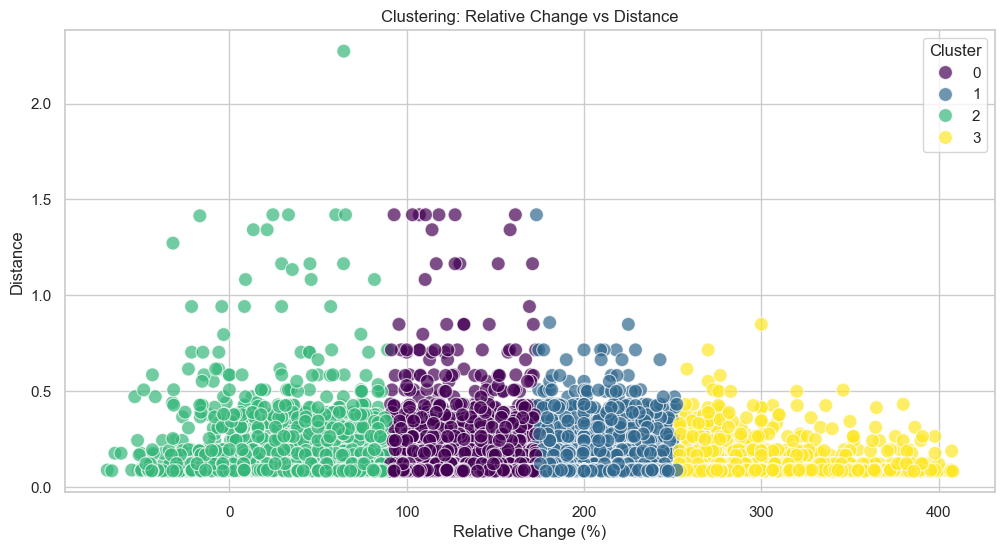

Cluster Statistics (Mean Relative Change):
   Cluster  relative_change
0        0       134.637776
1        1       210.877850
2        2        45.225417
3        3       294.575666


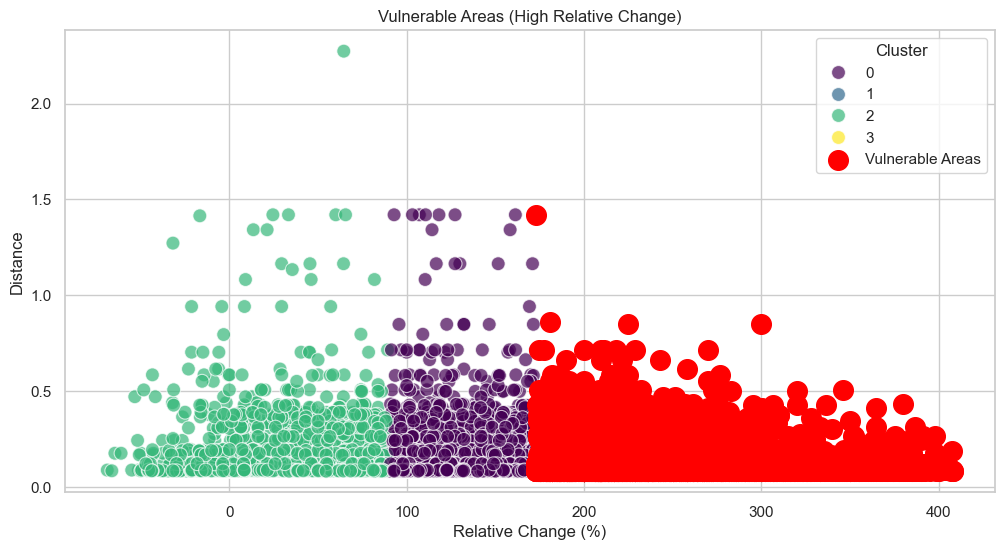

In [143]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering: relative change and distance
X = filtered_df[['relative_change', 'distance']]

# Perform K-means clustering with k=4 (can adjust k based on results)
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clustering result
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='relative_change', y='distance', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clustering: Relative Change vs Distance')
plt.xlabel('Relative Change (%)')
plt.ylabel('Distance')
plt.legend(title='Cluster', loc='best')
plt.show()

# 1. Calculate the mean relative change for each cluster
cluster_stats = filtered_df.groupby('Cluster')['relative_change'].mean().reset_index()
print("Cluster Statistics (Mean Relative Change):")
print(cluster_stats)

# 2. Identify clusters with high relative change (vulnerable areas)
# Define vulnerable clusters as those with a high mean relative change (above the average of all clusters)
average_relative_change = cluster_stats['relative_change'].mean()
vulnerable_cluster = cluster_stats[cluster_stats['relative_change'] > average_relative_change]

# 3. Extract vulnerable clusters' indices
vulnerable_clusters = vulnerable_cluster['Cluster'].values

# 4. Visualizing the clusters with high relative change highlighted (vulnerable areas)
plt.figure(figsize=(12, 6))

# Scatter plot for the clusters
sns.scatterplot(data=filtered_df, x='relative_change', y='distance', hue='Cluster', palette='viridis', s=100, alpha=0.7)

# Highlight vulnerable areas (clusters with high relative change)
plt.scatter(
    filtered_df[filtered_df['Cluster'].isin(vulnerable_clusters)]['relative_change'], 
    filtered_df[filtered_df['Cluster'].isin(vulnerable_clusters)]['distance'], 
    color='red', 
    label='Vulnerable Areas', 
    s=200
)

plt.title('Vulnerable Areas (High Relative Change)')
plt.xlabel('Relative Change (%)')
plt.ylabel('Distance')
plt.legend(title='Cluster', loc='best')
plt.show()


In [144]:
# Extract the rows that correspond to vulnerable clusters (those with high relative change)
vulnerable_data = filtered_df[filtered_df['Cluster'].isin(vulnerable_clusters)]

# Extract the relevant columns (including the index) for vulnerable areas
vulnerable_areas = vulnerable_data[['Cluster', 'x0', 'y0', 'x1', 'y1']]

# Display the vulnerable areas with their index
vulnerable_areas_with_index = vulnerable_data[['Cluster', 'x0', 'y0', 'x1', 'y1']].reset_index()

# Show the result
print(vulnerable_areas_with_index)


      index  Cluster         x0         y0         x1         y1
0         4        1  62.788086   9.350634  63.139650   9.350634
1         7        1  62.788086   9.434505  63.051758   9.098787
2        10        1  62.875977   8.425543  62.963867   8.425543
3        12        1  62.875977   8.425543  63.315430   8.172468
4        13        3  62.875977   8.425543  63.491210   8.425543
...     ...      ...        ...        ...        ...        ...
6962  14142        3  65.864260  12.344622  65.864260  12.262192
6963  14153        1  65.864260  11.932035  65.776370  11.849388
6964  14154        3  65.864260  11.932035  65.776370  11.932035
6965  14155        1  65.864260  11.932035  65.864260  12.014641
6966  14156        1  65.864260  12.673901  65.776370  12.673901

[6967 rows x 6 columns]


Correlation between relative change and distance:
                 relative_change  distance
relative_change          1.00000  -0.14946
distance                -0.14946   1.00000


C:\Users\dell\AppData\Local\Temp\ipykernel_3180\1104569006.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



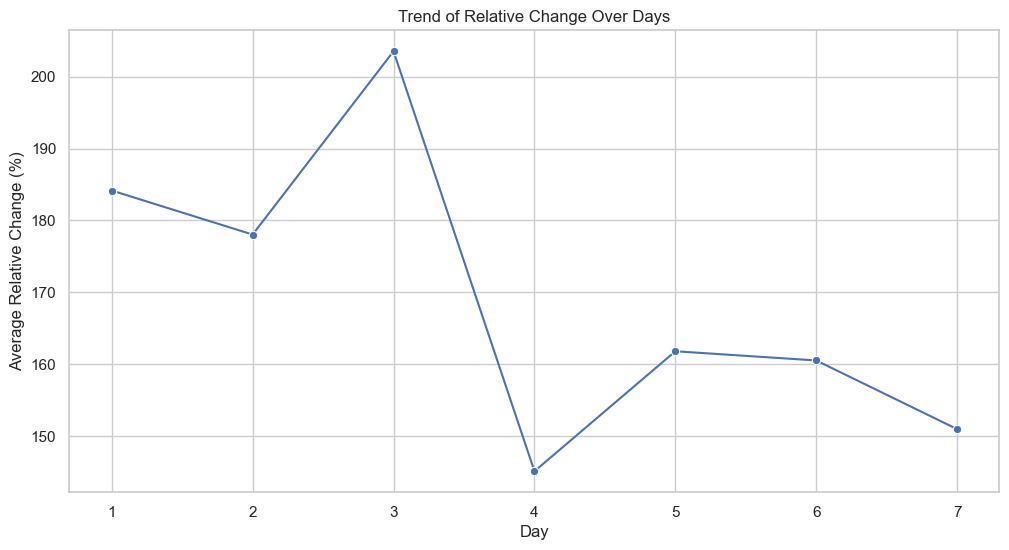

In [145]:
# Calculate correlation between relative change and distance
correlation = filtered_df[['relative_change', 'distance']].corr()
print("Correlation between relative change and distance:")
print(correlation)

# Investigate trends over the 7 days: Check for increasing or decreasing mobility
filtered_df['day'] = filtered_df['time_period'].str.extract(r'(\d)')[0].astype(int)  # Extract day number (e.g., day1, day2, etc.)
trend_over_days = filtered_df.groupby('day')['relative_change'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_over_days, x='day', y='relative_change', marker='o')
plt.title('Trend of Relative Change Over Days')
plt.xlabel('Day')
plt.ylabel('Average Relative Change (%)')
plt.show()


In [146]:
# Assuming you have a 'time' or 'date' column in your dataset (e.g., filtered_df['date'])

# Group the data by time and cluster, then calculate the mean relative change for each group
time_cluster_trends = filtered_df.groupby(['time_period', 'Cluster'])['relative_change'].mean().reset_index()

# Create a line plot with Plotly
fig2 = px.line(time_cluster_trends, 
               x='time_period', 
               y='relative_change', 
               color='Cluster', 
               title='Relative Change Trends Over Time by Cluster',
               labels={'relative_change': 'Relative Change (%)', 'time_period': 'Date'},
               markers=True)  # Show markers for each data point

# Show the plot
fig2.update_layout(
    xaxis_title='Date',
    yaxis_title='Relative Change (%)',
    legend_title='Cluster'
)
fig2.show()
